In [20]:
# Import packages required
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [21]:
def func_model_training(model,x,y):
    num_epochs=2000
    epoch_list=list()
    loss_list=list()
    epoch_iter=1
    grad_list=[]
    while(True):
        predicted_y = model(x)
        loss=loss_function(predicted_y,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_list.append(epoch_iter)
        loss_list.append(loss.detach().numpy())
        
        grad_all=0.0
        for p in model.parameters():
            grad=0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        grad_list.append(grad_norm)
        if epoch_iter % 500 == 0: 
            print("epoch: ",str(epoch_iter),", loss = {0:.5f}".format(loss.item()),", convergence = "+str(abs(loss_list[-1]-loss_list[-2])))
        if(epoch_iter>=num_epochs):
            print("reached max epochs")
            break
        elif (loss_list[-1] < 0.001):
            if abs(loss_list[-3] - loss_list[-2]) < 1.0e-05 and abs(loss_list[-2] - loss_list[-1]) < 1.0e-05:
                print("loss Converged:",loss_list[-1])
                break
        epoch_iter +=1
    return epoch_list,loss_list,predicted_y,grad_list
        

In [33]:
x=np.expand_dims(np.arange(-1.5, 1.5, 0.01),1) 
y=np.sin(5*(np.pi)*x)/(5*(np.pi)*x)

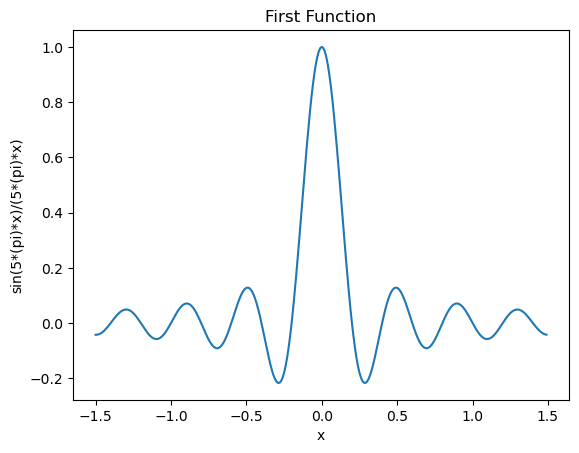

In [34]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.plot(x,y)
plt.title("First Function")
plt.xlabel("x")
plt.ylabel("sin(5*(pi)*x)/(5*(pi)*x)")
plt.show()

In [35]:
class NN1(nn.Module):
    def __init__(self,):
        super(NN1,self).__init__()
        self.l1 = nn.Linear(1,5)
        self.l2 = nn.Linear(5,8)
        self.l3 = nn.Linear(8,10)
        self.l4 = nn.Linear(10,10)
        self.l5 = nn.Linear(10,10)
        self.l6 = nn.Linear(10,10)
        self.l7 = nn.Linear(10,8)
        self.l8 = nn.Linear(8,5)
        self.output = nn.Linear(5,1)
    
    def forward(self,x):
        x=F.leaky_relu(self.l1(x))
        x=F.leaky_relu(self.l2(x))
        x=F.leaky_relu(self.l3(x))
        x=F.leaky_relu(self.l4(x))
        x=F.leaky_relu(self.l5(x))
        x=F.leaky_relu(self.l6(x))
        x=F.leaky_relu(self.l7(x))
        x=F.leaky_relu(self.l8(x))
        x=self.output(x)
        
        return x
        

In [48]:
nn1=NN1()
optimizer = torch.optim.Adam(nn1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_function = nn.MSELoss()
total_params_nn1=sum(p.numel() for p in nn1.parameters())
print(total_params_nn1)
nn1_epoch_list, nn1_loss_list, nn1_predict_list,nn1_grad_list = func_model_training(nn1, x, y)

617
epoch:  500 , loss = 0.00538 , convergence = 6.8056397e-06
epoch:  1000 , loss = 0.00364 , convergence = 5.934853e-07
epoch:  1500 , loss = 0.00349 , convergence = 2.2607855e-07
epoch:  2000 , loss = 0.00314 , convergence = 1.7764978e-07
reached max epochs


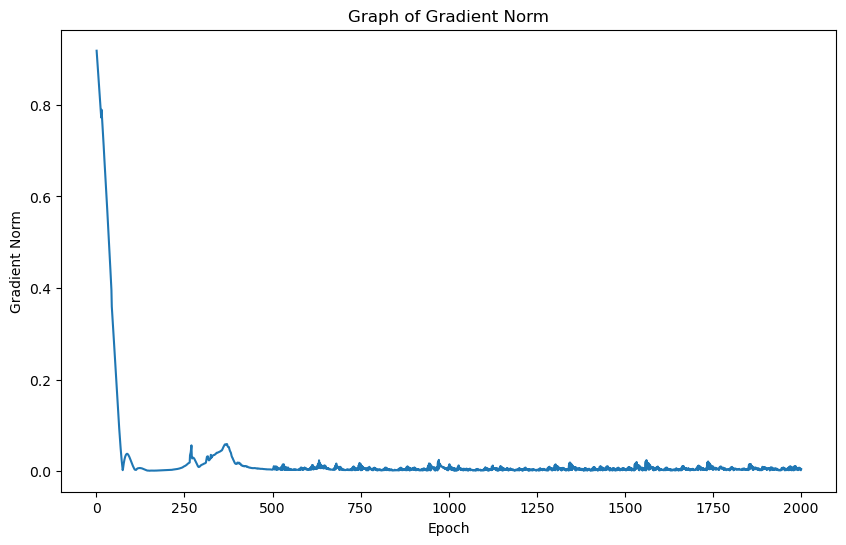

In [52]:
plt.figure(figsize=(10,6))
plt.plot(nn1_epoch_list, nn1_grad_list)
plt.title('Graph of Gradient Norm')
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.show()

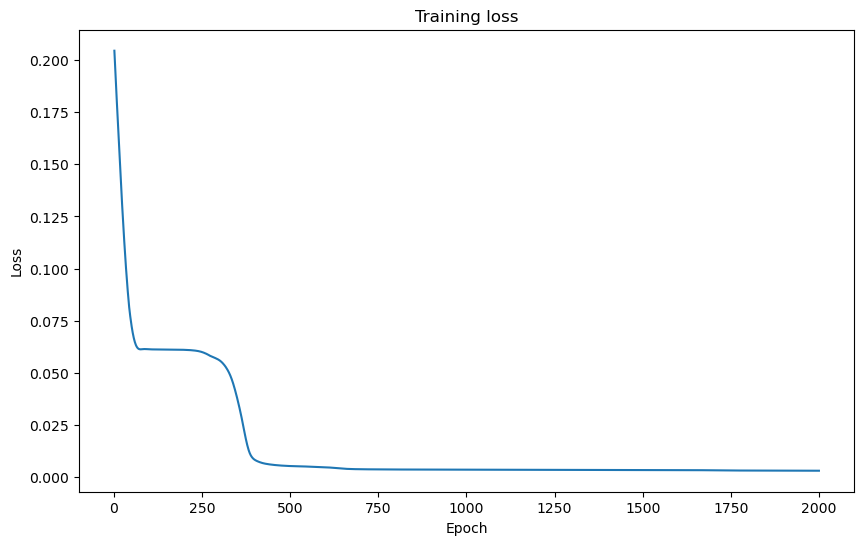

In [53]:
plt.figure(figsize=(10,6))
plt.plot(nn1_epoch_list, nn1_loss_list)
plt.title('Training loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

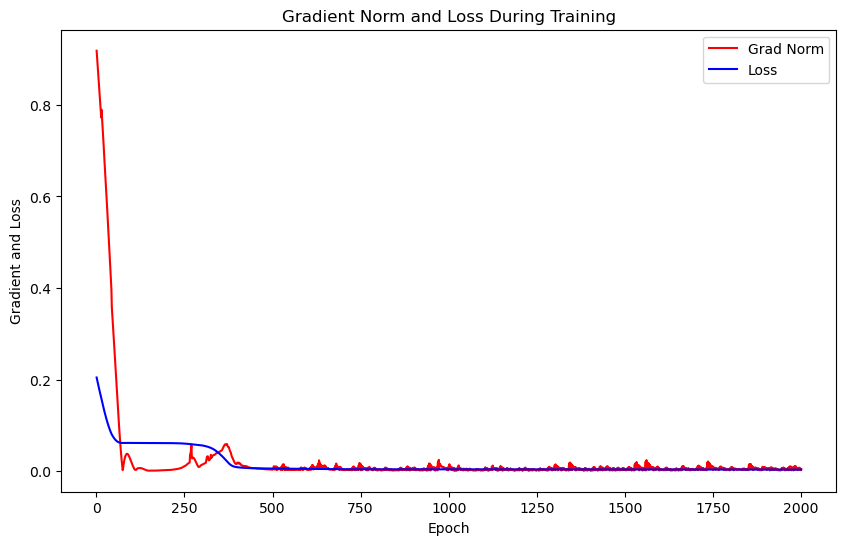

In [55]:
plt.figure(figsize=(10,6))
plt.plot(nn1_epoch_list, nn1_grad_list,color='r',label='Grad Norm')
plt.plot(nn1_epoch_list, nn1_loss_list,color='b',label='Loss')
plt.title('Gradient Norm and Loss During Training')
plt.xlabel("Epoch")
plt.ylabel("Gradient and Loss")
plt.legend()
plt.show()